# Telco Churn Prediction

# Data Understanding

### Feature Information

* **customerID:** A unique ID that identifies each customer.,
* **gender:** The customer’s gender - Male, Female,
* **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0),
* **Partner:** Whether the customer has a partner or not (Yes, No),
* **Dependents:** Whether the customer has dependents or not (Yes, No),
* **tenure:** Number of months the customer has stayed with the company,
* **PhoneService:** Whether the customer has a phone service or not (Yes, No),
* **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service),
* **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No),
* **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service),
* **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service),
* **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service),
* **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service),
* **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service),
* **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service),
* **Contract:** The contract term of the customer (Month-to-month, One year, Two year),
* **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No),
* **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)),
* **MonthlyCharges:** The amount charged to the customer monthly,
* **TotalCharges:** The total amount charged to the customer,
* **Churn:** Whether the customer churned or not (Yes or No).

# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

### get data

In [2]:
data=pd.read_csv('Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Cheking Missing Value

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
data.duplicated().sum()

0

In [12]:
# calculating median of TotalCharges 
x=np.median(data.query('TotalCharges != " "')['TotalCharges'].astype('float'))
x

1397.475

In [13]:
data['TotalCharges']=data['TotalCharges'].replace(" " , x)

In [14]:
data['TotalCharges']=data['TotalCharges'].astype('float')

In [15]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
round(data['Churn'].value_counts(normalize=True)*100 , 2 )

No     73.46
Yes    26.54
Name: Churn, dtype: float64

In [18]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [19]:
data=data.drop(columns=["customerID"] , axis=1 )

In [20]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

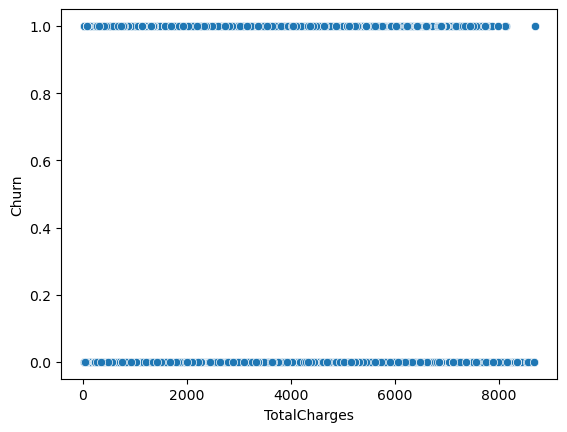

In [22]:
sns.scatterplot(x=data['TotalCharges'] , y=data['Churn'])

H:\install anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

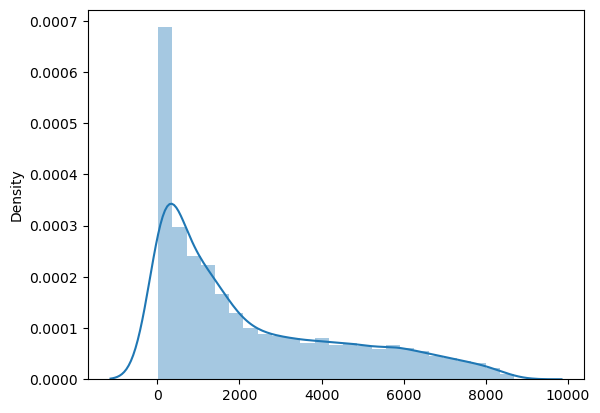

In [23]:
sns.distplot(x=data['TotalCharges'])

H:\install anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

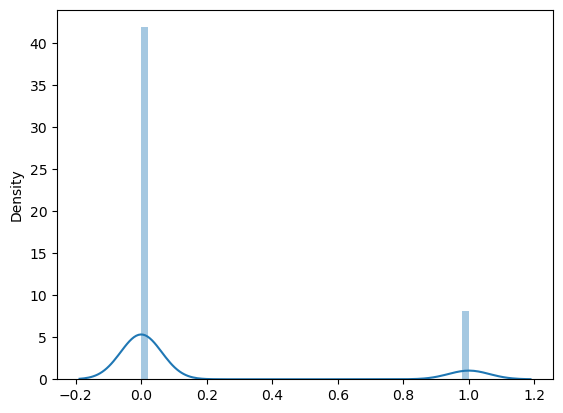

In [24]:
sns.distplot(x=data['SeniorCitizen'])

In [25]:
data['SeniorCitizen'].mean()

0.1621468124378816

In [26]:
# data.drop(data[data['SeniorCitizen']>0.8].index,axis=0, inplace=True)

In [27]:
# data.drop(data[data['TotalCharges']>6000].index,axis=0, inplace=True)

In [28]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6237,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,69.95,69.95,1
3023,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.30,0
5719,Female,0,Yes,Yes,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,494.05,0


In [29]:
data['TotalCharges'].max()

8684.8

In [30]:
cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

# value_counts

In [31]:
for i in (cat) :
    print(i)
    print('~.'*5)
    print(data[i].value_counts())
    print('-'*100)
    

gender
~.~.~.~.~.
Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
SeniorCitizen
~.~.~.~.~.
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------------------------------------------------------------------------------------------------
Partner
~.~.~.~.~.
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------------------------------------------------------------------
Dependents
~.~.~.~.~.
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------------------------------------------------------------------
PhoneService
~.~.~.~.~.
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------------------------------------------------------------------
MultipleLines
~.~.~.~.~.
No                  3390
Yes                 2971
No phone service     682
Name: Multip

# <font color='blue'> Data visualization

In [32]:
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    
    if data[feature].nunique()==2:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts().index
        ax=plt.pie(x=[a,b] , labels=c ,autopct='%1.2f%%')
        
    elif data[feature].nunique()==3:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts()[2]
        d=data[feature].value_counts().index
        ax=plt.pie(x=[a,b,c] , labels=d ,autopct='%1.2f%%')
    else:
        a=data[feature].value_counts()[0]
        b=data[feature].value_counts()[1]
        c=data[feature].value_counts()[2]
        d=data[feature].value_counts()[3]
        e=data[feature].value_counts().index
        ax=plt.pie(x=[a,b,c,d] , labels=e ,autopct='%1.2f%%')
        
    plt.subplot(1,2,2)
    ax=sns.countplot(x=data[feature],hue=data.Churn)
    plt.xticks(rotation=90)

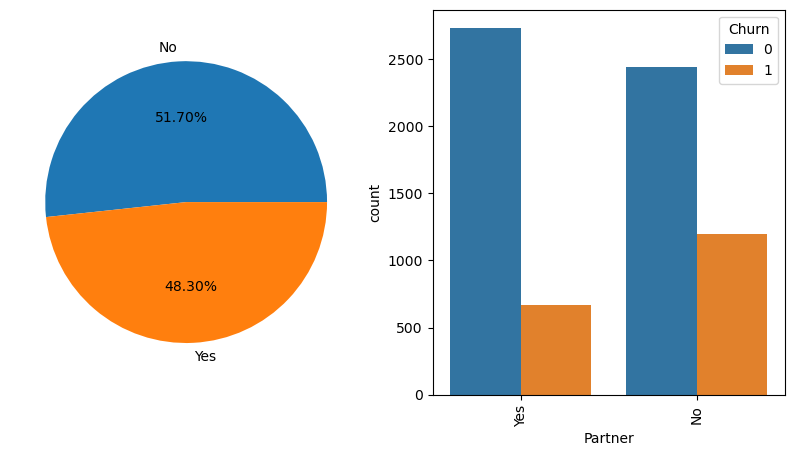

In [33]:
plot_cat('Partner')

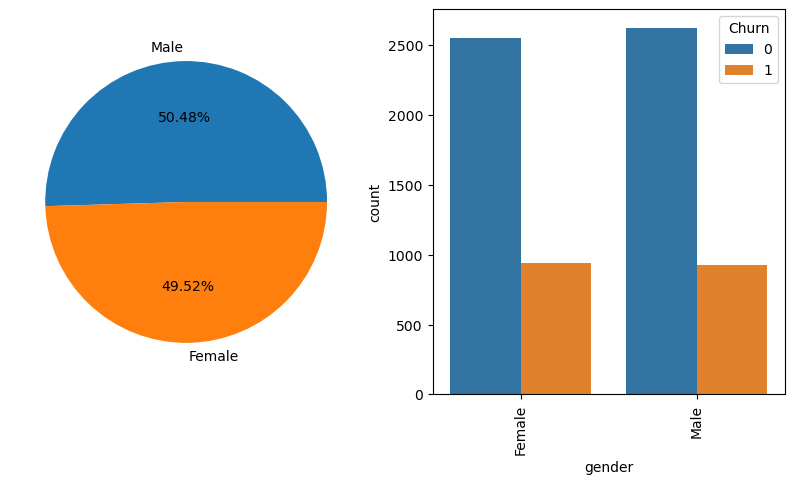

In [34]:
plot_cat('gender')

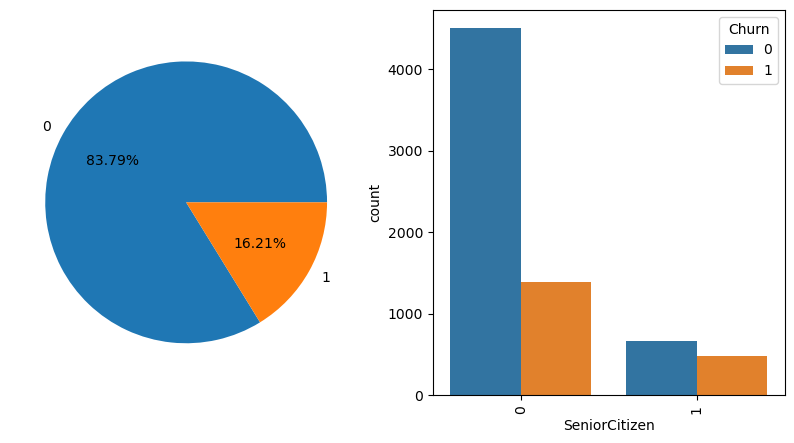

In [35]:
plot_cat('SeniorCitizen')

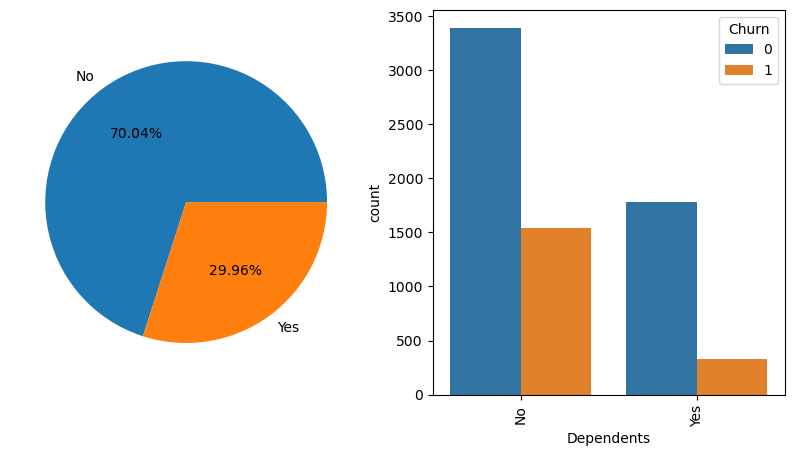

In [36]:
plot_cat('Dependents')

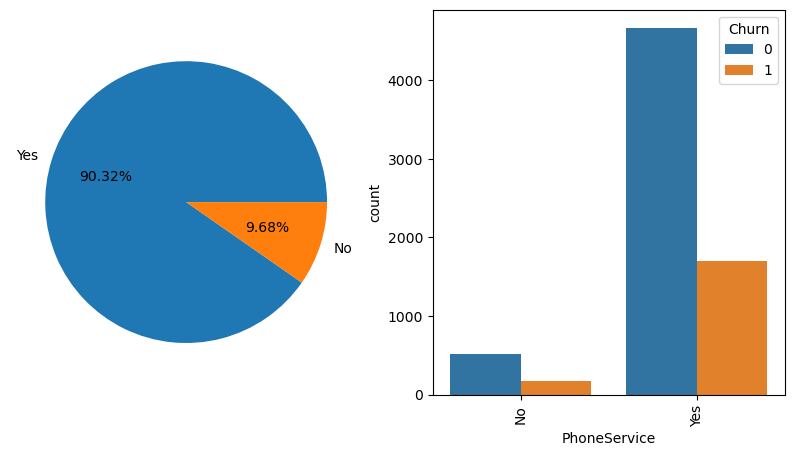

In [37]:
plot_cat('PhoneService')

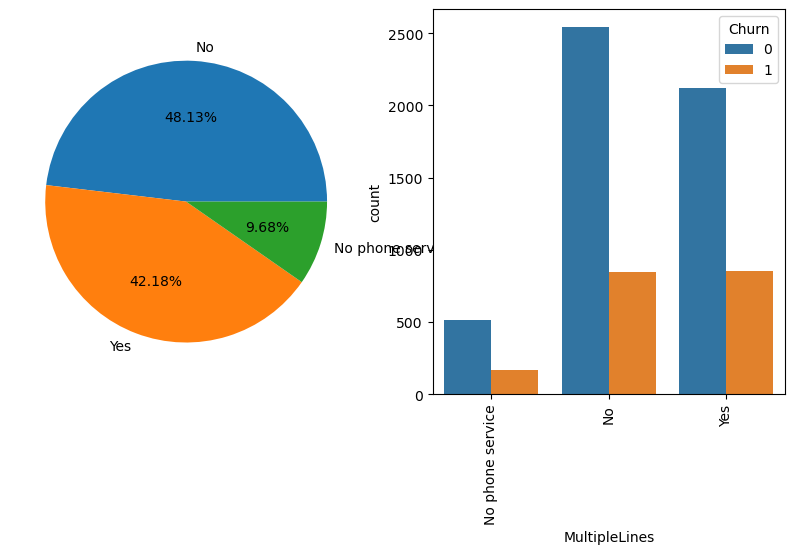

In [38]:
plot_cat('MultipleLines')

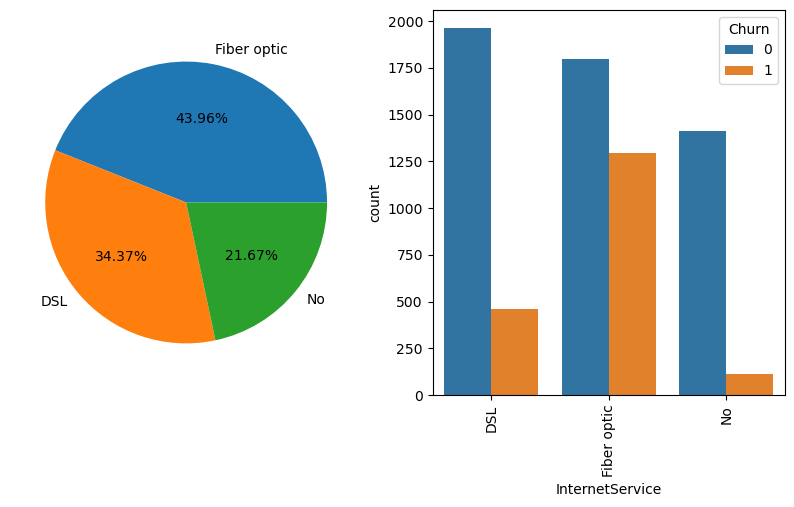

In [39]:
plot_cat('InternetService')

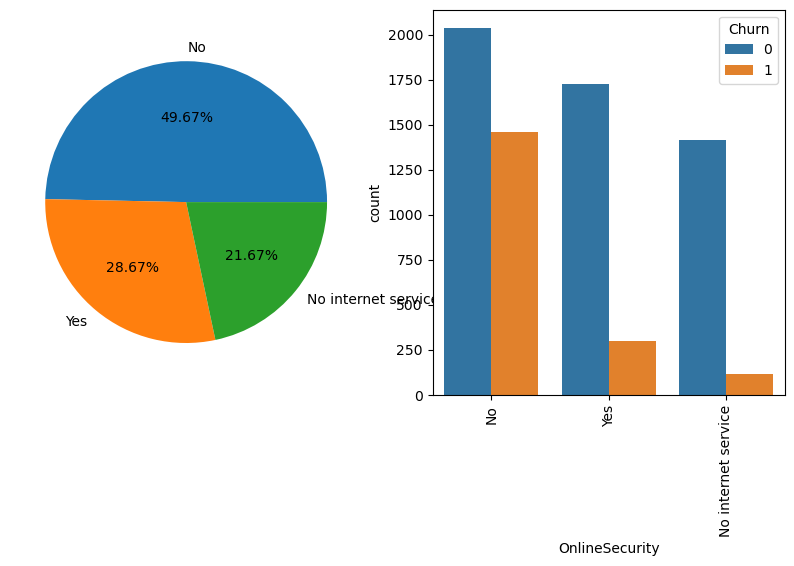

In [40]:
plot_cat('OnlineSecurity')

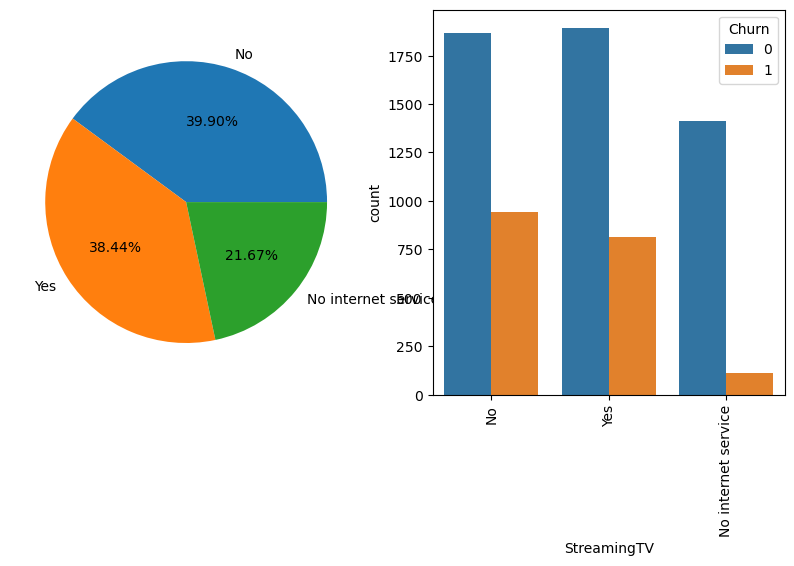

In [41]:
plot_cat('StreamingTV')

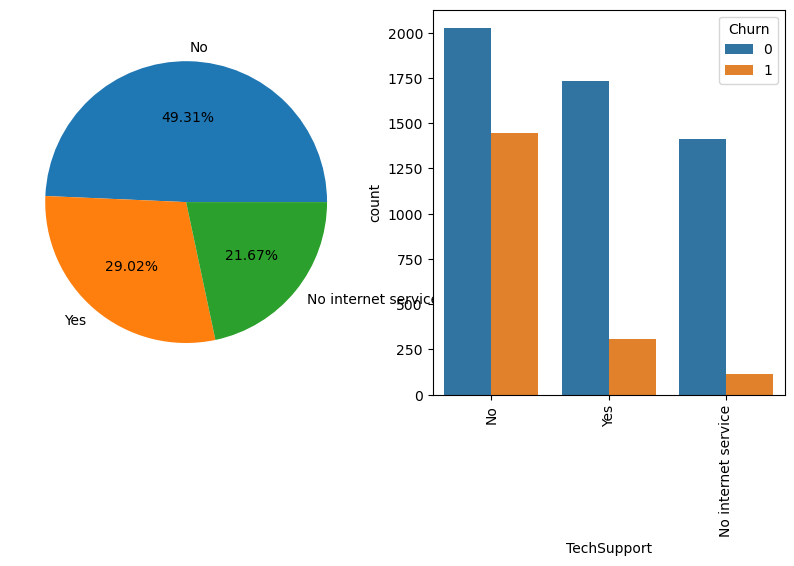

In [42]:
plot_cat('TechSupport')

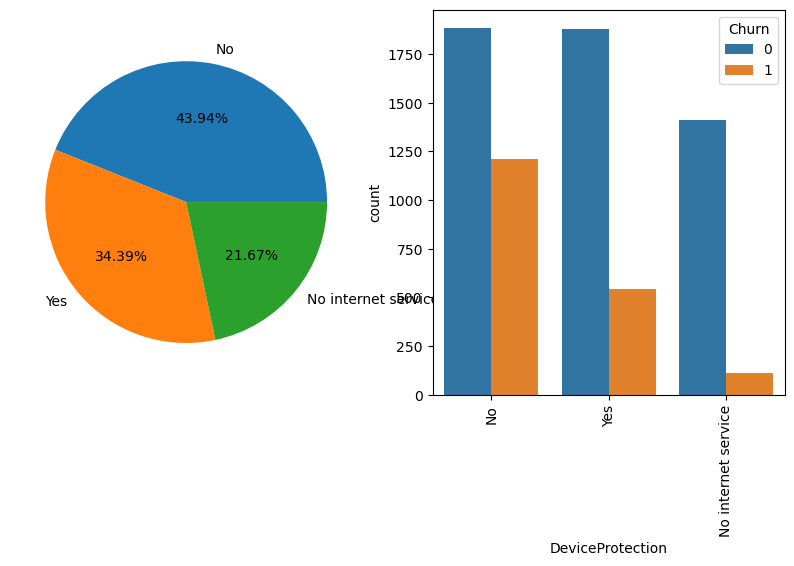

In [43]:
plot_cat('DeviceProtection')

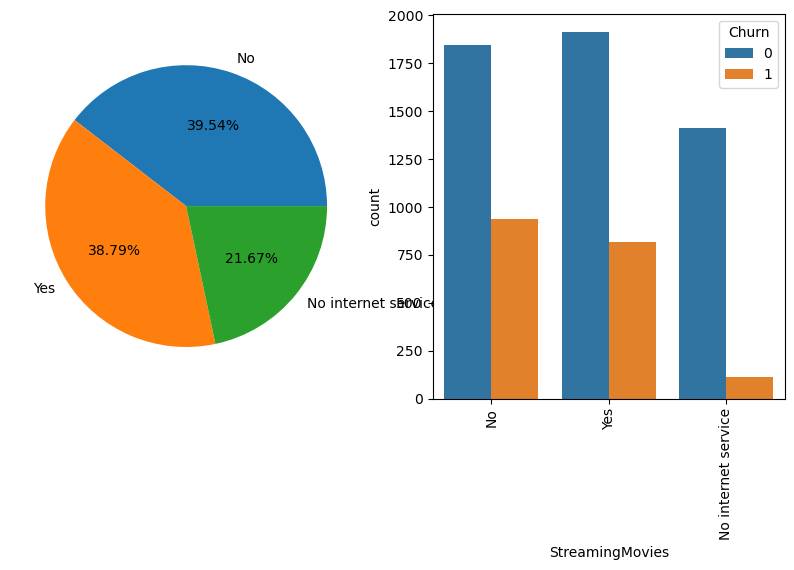

In [44]:
plot_cat('StreamingMovies')

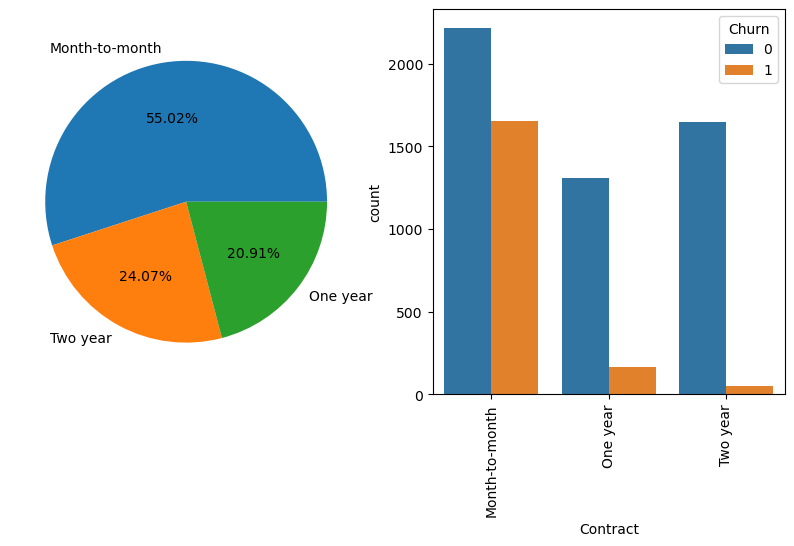

In [45]:
plot_cat('Contract')

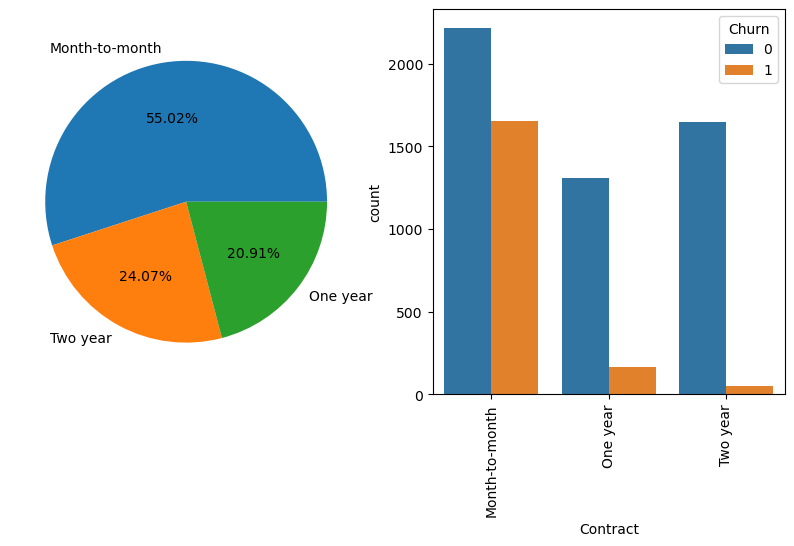

In [46]:
plot_cat('Contract')

In [47]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
def plot_num(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y=data[feature] ,x=data.Churn)
    plt.subplot(1,2,2)
    sns.histplot(x=data[feature] ,kde=True)

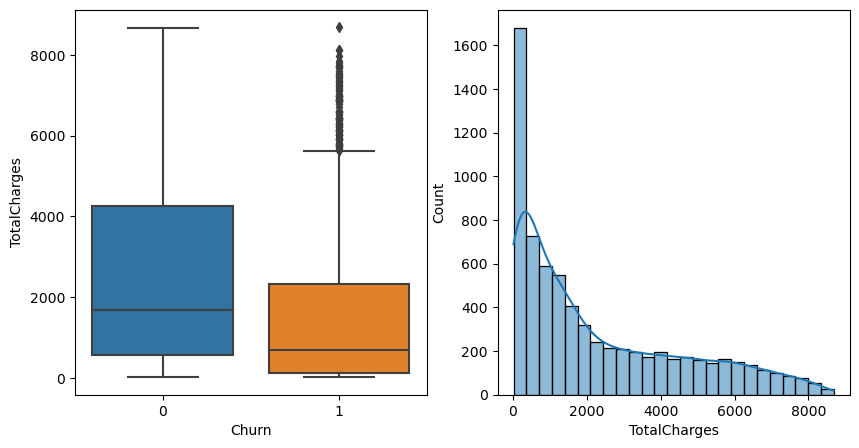

In [49]:
plot_num('TotalCharges')

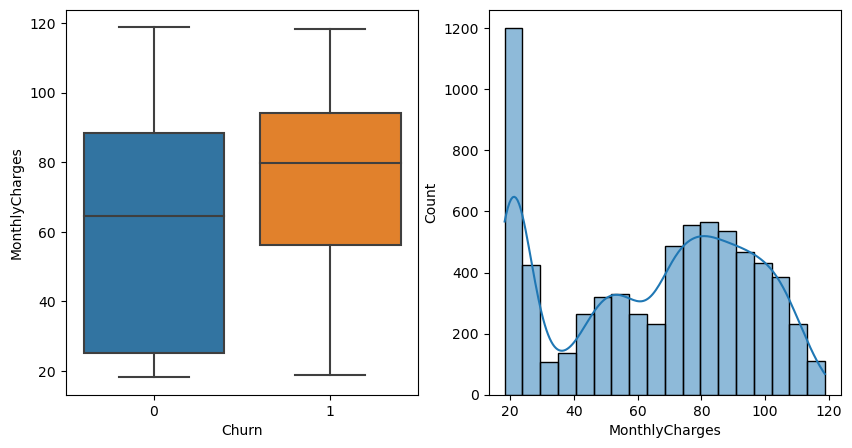

In [50]:
plot_num('MonthlyCharges')

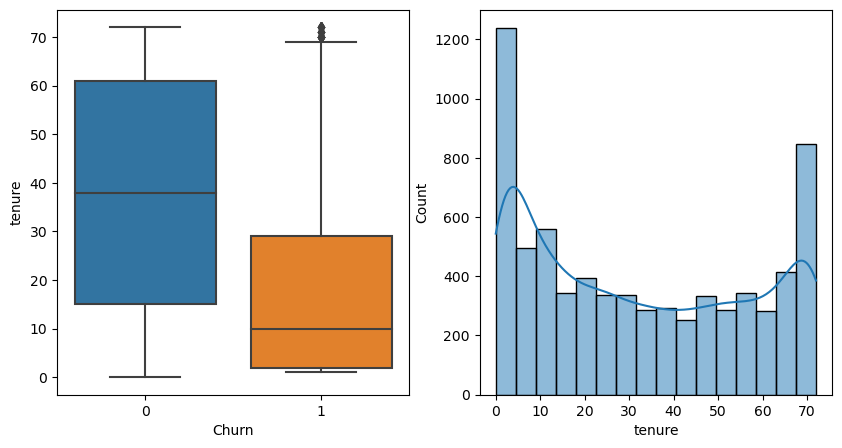

In [51]:
plot_num('tenure')

In [52]:
# pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lazypredict (from versions: none)
ERROR: No matching distribution found for lazypredict


# <font color='red'> Splitting data

In [53]:
x=data.drop('Churn', axis=1)
y=data['Churn']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# <font color='orange'> Data Preprocessing

In [54]:

from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [55]:
# Preprocessing for numerical data
numerical_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer=Pipeline(steps=[
    ('cat',OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['tenure', 'MonthlyCharges', 'TotalCharges']),
        ('cat', categorical_transformer, ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Partner', 'Dependents', 'gender'])])

x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

# <font color='blue'> Modeling

In [56]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=1)
clf.fit(x_train_preprocessed,y_train)
clf.score(x_test_preprocessed , y_test)

0.8183108587650816

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'gini')
dt.fit(x_train_preprocessed,y_train)
y_pred=dt.predict(x_test_preprocessed)

# Use score method to get accuracy of model
score=dt.score(x_test_preprocessed , y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.7097232079489


In [58]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 150)
rc.fit(x_train_preprocessed, y_train) 
RandomForestClassifier(n_estimators=150)
y_pred=rc.predict(x_test_preprocessed)

# Use score method to get accuracy of model
score = rc.score(x_test_preprocessed, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.794889992902768


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(x_train_preprocessed, y_train)
score=clf.score(x_test_preprocessed, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.8176011355571328


In [60]:
from sklearn.svm import SVC
clf.fit(x_train_preprocessed, y_train)
score = clf.score(x_test_preprocessed, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.8176011355571328
